Nivashini J
235229119

Head:
   drivenKM  fuelAmount
0     390.0      3600.0
1     403.0      3705.0
2     396.5      3471.0
3     383.5      3250.5
4     321.1      3263.7

Shape:
(19, 2)

Columns:
Index(['drivenKM', 'fuelAmount'], dtype='object')

Data Types:
drivenKM      float64
fuelAmount    float64
dtype: object

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 2 columns):
drivenKM      19 non-null float64
fuelAmount    19 non-null float64
dtypes: float64(2)
memory usage: 384.0 bytes
None

Missing Values:
drivenKM      0
fuelAmount    0
dtype: int64


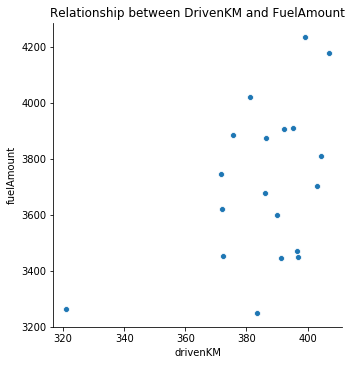


Type of X: <class 'pandas.core.frame.DataFrame'>
Type of y: <class 'pandas.core.series.Series'>

Shapes of Train and Test Sets:
X_train: (15, 1)
X_test: (4, 1)
y_train: (15,)
y_test: (4,)

Predicted price for 800 km: [6905.64571567]

Mean Squared Error (MSE): 46130.308605449296
R2 Error: -0.6181788214791559

Model Parameters:
Coefficients: [7.63373063]
Intercept: 798.6612098962887

Mean Squared Error (Scaled): 46130.30860544946
R2 Error (Scaled): -0.6181788214791619


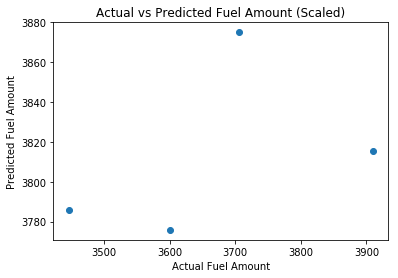

MSE (MinMax scaled): 46130.30860544944
MSE (KNN Regressor): 21207.253700000023
MSE (SGD Regressor): 1.6361941652126575e+29
Model with lowest MSE: KNN Regressor


In [6]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor


# Step 1: Prepare your dataset
# Assuming you've already created "fuel_data.csv" as mentioned in Step 1.

# Step 2: Import dataset
fuel_data = pd.read_csv("fuel_data.csv")

# Print properties
print("Head:")
print(fuel_data.head())

print("\nShape:")
print(fuel_data.shape)

print("\nColumns:")
print(fuel_data.columns)

print("\nData Types:")
print(fuel_data.dtypes)

print("\nInfo:")
print(fuel_data.info())

# Step 3: Preprocessing - Check for missing values
print("\nMissing Values:")
print(fuel_data.isnull().sum())

# Step 4: Visualize relationship
sns.relplot(x="drivenKM", y="fuelAmount", data=fuel_data)
plt.title("Relationship between DrivenKM and FuelAmount")
plt.show()



# Step 5: Prepare X and y
X = fuel_data[["drivenKM"]]
y = fuel_data["fuelAmount"]

# Step 6: Examine X and y
print("\nType of X:", type(X))
print("Type of y:", type(y))

# Step 7: Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nShapes of Train and Test Sets:")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

# Part 1: Linear Regression Baseline Model
# Step 8: Build model
model = LinearRegression()
model.fit(X_train, y_train)


# Step 9: Predict price for 800 km
pred_800km = model.predict([[800]])
print("\nPredicted price for 800 km:", pred_800km)

# Step 10: Predict on entire dataset
y_pred = model.predict(X_test)



# Step 11: Print mean squared error and R2 error
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nMean Squared Error (MSE):", mse)
print("R2 Error:", r2)

print("\nModel Parameters:")
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# Part 2: Linear Regression with Scaling using StandardScaler








# Step 12: Normalize X_train and X_test values
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 13: Build LR model
model_scaled = LinearRegression()
model_scaled.fit(X_train_scaled, y_train)

# Step 14: Print Mean Squared Error and R2 Error
y_pred_scaled = model_scaled.predict(X_test_scaled)
mse_scaled = mean_squared_error(y_test, y_pred_scaled)
r2_scaled = r2_score(y_test, y_pred_scaled)

print("\nMean Squared Error (Scaled):", mse_scaled)
print("R2 Error (Scaled):", r2_scaled)

# Step 15: Plot scatter plot
plt.scatter(y_test, y_pred_scaled)
plt.xlabel("Actual Fuel Amount")
plt.ylabel("Predicted Fuel Amount")
plt.title("Actual vs Predicted Fuel Amount (Scaled)")
plt.show()

# Step 16: Repeat with MinMaxScaler
scaler_minmax = MinMaxScaler()
X_train_minmax = scaler_minmax.fit_transform(X_train)
X_test_minmax = scaler_minmax.transform(X_test)

model_minmax = LinearRegression()
model_minmax.fit(X_train_minmax, y_train)
y_pred_minmax = model_minmax.predict(X_test_minmax)

mse_minmax = mean_squared_error(y_test, y_pred_minmax)
print("MSE (MinMax scaled):", mse_minmax)

# Step 17: Compare KNN Regressor
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

mse_knn = mean_squared_error(y_test, y_pred_knn)
print("MSE (KNN Regressor):", mse_knn)

# Step 18: Compare SGD Regressor
sgd_model = SGDRegressor(max_iter=1000, tol=1e-3)  # Set max_iter and tol here
sgd_model.fit(X_train, y_train)
y_pred_sgd = sgd_model.predict(X_test)

mse_sgd = mean_squared_error(y_test, y_pred_sgd)
print("MSE (SGD Regressor):", mse_sgd)

# Step 19: Select best model
mse_values = {
    'Linear Regression': mse,
    'Linear Regression (Scaled)': mse_scaled,
    'Linear Regression (MinMax Scaled)': mse_minmax,
    'KNN Regressor': mse_knn,
    'SGD Regressor': mse_sgd
}

best_model = min(mse_values, key=mse_values.get)
print("Model with lowest MSE:", best_model)